In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import fetch_california_housing
from sklearn import linear_model

In [7]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
california = fetch_california_housing()
dataset = pd.DataFrame(california.data, columns=california.feature_names)
dataset['MedHouseVal'] = california.target

In [28]:
observations = len(dataset)
variables = dataset.columns[:-1]
X = dataset.iloc[:, :-1]
y = dataset['MedHouseVal'].values


In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
Xc = sm.add_constant(X)
linear_regression = sm.OLS(y,Xc)
fitted_model = linear_regression.fit()

In [31]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        12:32:37   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.000     -38.233     -35.650
MedInc         0.4367      0.004    104.054      0.000       0.428       0.445
HouseAge       0.0094      0.000     21.143      0.000       0.009       0.010
AveRooms      -0.1073      0.006    -18.235      0.000      -0.119      -0.096
AveBedrms      0.6451      0.028     22.928      0.000       0.590       0.700
Population -3.976e-06   4.75e-06     -0.837      0.402   -1.33e-05    5.33e-06
AveOccup      -0.0038      0.000     -7.769      0.000      -0.005      -0.003
Latitude      -0.4213      0.007    -58.541      0.000      -0.435      -0.407
Longitude     -0.4345      0.008    -57.682      0.000      -0.449      -0.420
==============================================================================
Omnibus:                     4393.650   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14087.596
Skew:                           1.082   Prob(JB):                         0.00
Kurtosis:                       6.420   Cond. No.                     2.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
X = dataset.iloc[:, :-1]
correlation_matrix = X.corr()
print (correlation_matrix)

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000  


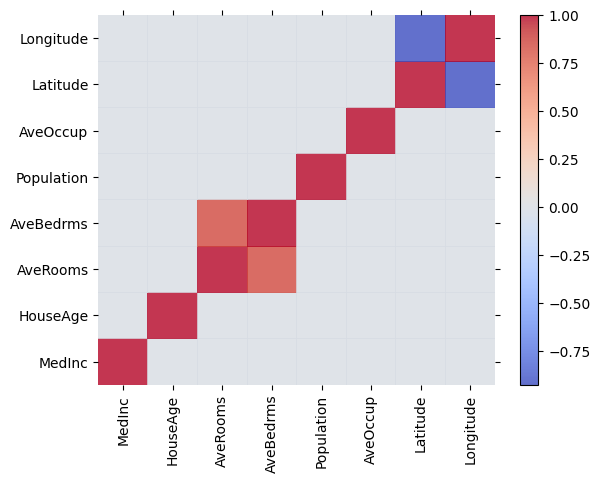

In [14]:
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R)<hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(variables, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left = 'off', right = 'off')
    plt.colorbar()
    plt.show()

visualize_correlation_matrix(X, hurdle=0.5)

In [15]:
corr = np.corrcoef(X, rowvar=0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

In [16]:
print (eigenvalues)

[2.02694942 1.88129959 0.04558513 0.08160178 0.65938003 1.27109076
 1.03103768 1.0030556 ]


Shape of eigenvectors array: (8, 8)
Eigenvectors array:
[[-0.07746229  0.22987873  0.24227053  0.16923764 -0.14981849  0.21822239
   0.88529408 -0.00260258]
 [-0.00731846 -0.26078574  0.04484583 -0.0810348  -0.68393093 -0.6275508
   0.10989777  0.22293588]
 [-0.43914246  0.54668689 -0.45881371 -0.53066164 -0.09505449 -0.06399944
   0.04640173  0.02985194]
 [-0.3999956   0.50184958  0.37987469  0.53156581 -0.08685356 -0.19184813
  -0.33814378  0.05092211]
 [ 0.17178267  0.10062559  0.01316952 -0.03167607 -0.67522557  0.65037482
  -0.28320692  0.00807783]
 [ 0.01464423  0.00262099 -0.00895931  0.00324648  0.16941048  0.15772711
  -0.00491848  0.97266948]
 [-0.56836442 -0.37401073  0.55441475 -0.43179746  0.04206944  0.19259966
  -0.062214   -0.02276072]
 [ 0.53697448  0.4223868   0.52616501 -0.461698    0.08255109 -0.18082441
  -0.05984646  0.01180653]]
The eigenvectors array does not have a column index 8. Its shape is: (8, 8)
Here is the last column instead:
[-0.00260258  0.22293588  0

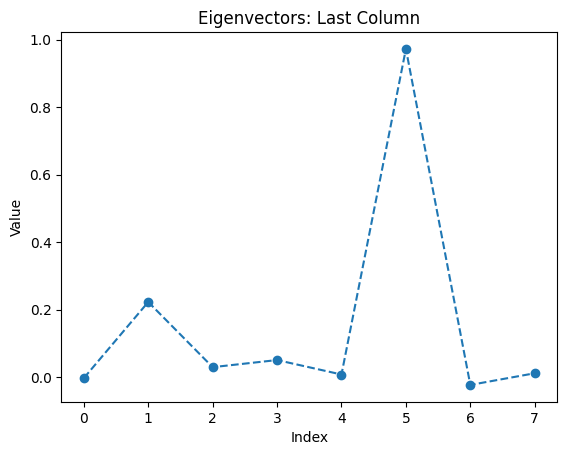

In [17]:
# Print the shape of the eigenvectors array
print("Shape of eigenvectors array:", eigenvectors.shape)

# Print the entire eigenvectors array to understand its structure
print("Eigenvectors array:")
print(eigenvectors)

# Ensure there are enough columns, if not, print the last column
if eigenvectors.shape[1] > 8:
    print("Eigenvectors at column index 8:")
    print(eigenvectors[:, 8])
else:
    print(f"The eigenvectors array does not have a column index 8. Its shape is: {eigenvectors.shape}")
    print("Here is the last column instead:")
    print(eigenvectors[:, -1])

# Example of further analysis or visualization
import matplotlib.pyplot as plt

# Plot the selected column data
plt.plot(eigenvectors[:, -1], marker='o', linestyle='--')
plt.title('Eigenvectors: Last Column')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


In [18]:
import numpy as np

# Eigenvectors array
eigenvectors = np.array([
    [-0.07746229,  0.22987873,  0.24227053,  0.16923764, -0.14981849,  0.21822239,  0.88529408, -0.00260258],
    [-0.00731846, -0.26078574,  0.04484583, -0.0810348,  -0.68393093, -0.6275508,   0.10989777,  0.22293588],
    [-0.43914246,  0.54668689, -0.45881371, -0.53066164, -0.09505449, -0.06399944,  0.04640173,  0.02985194],
    [-0.3999956,   0.50184958,  0.37987469,  0.53156581, -0.08685356, -0.19184813, -0.33814378,  0.05092211],
    [ 0.17178267,  0.10062559,  0.01316952, -0.03167607, -0.67522557,  0.65037482, -0.28320692,  0.00807783],
    [ 0.01464423,  0.00262099, -0.00895931,  0.00324648,  0.16941048,  0.15772711, -0.00491848,  0.97266948],
    [-0.56836442, -0.37401073,  0.55441475, -0.43179746,  0.04206944,  0.19259966, -0.062214,   -0.02276072],
    [ 0.53697448,  0.4223868,   0.52616501, -0.461698,    0.08255109, -0.18082441, -0.05984646,  0.01180653]
])

# Initialize variables to track the maximum absolute value and its column index
max_value = -np.inf
max_column_index = -1

# Iterate over each column to find the maximum absolute value
for i in range(eigenvectors.shape[1]):
    column_max = np.max(np.abs(eigenvectors[:, i]))
    if column_max > max_value:
        max_value = column_max
        max_column_index = i

# Print the index of the column with the maximum absolute value
print(f"The column with the maximum absolute value is at index: {max_column_index}")

# Print the name of the variable if names are available (assuming variable names are known)
variable_names = ['Variable1', 'Variable2', 'Variable3', 'Variable4', 'Variable5', 'Variable6', 'Variable7', 'Variable8']
if max_column_index != -1:
    print(f"The variable with the maximum absolute value is: {variable_names[max_column_index]}")


The column with the maximum absolute value is at index: 7
The variable with the maximum absolute value is: Variable8


In [19]:
print (variables[6], variables[7])

Latitude Longitude


In [20]:
from sklearn.preprocessing import StandardScaler

# 데이터 표준화
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_stds = standardization.scale_  # std_ 대신 scale_ 사용

Xst = np.column_stack((Xst, np.ones(observations)))
y = dataset['MedHouseVal'].values

print("Original means:", original_means)
print("Original standard deviations:", original_stds)


Original means: [ 3.87067100e+00  2.86394864e+01  5.42899974e+00  1.09667515e+00
  1.42547674e+03  3.07065516e+00  3.56318614e+01 -1.19569704e+02]
Original standard deviations: [1.89977569e+00 1.25852527e+01 2.47411320e+00 4.73899376e-01
 1.13243469e+03 1.03857980e+01 2.13590065e+00 2.00348319e+00]


In [21]:
import random
import numpy as np

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path

alpha = 0.01
w, path = optimize(Xst, y, alpha, eta = 10**-12, iterations = 20000)
print ("These are our final standardized coefficients: " + ', '.join(map(lambda x: "%0.4f" % x, w)))

These are our final standardized coefficients: 0.8296, 0.1188, -0.2656, 0.3057, -0.0045, -0.0393, -0.8998, -0.8705, 2.0686


In [22]:
# Assuming that 'w' is already defined in the context
unstandardized_betas = w[:-1] / original_stds
unstandardized_bias  = w[-1] - np.sum((original_means / original_stds) * w[:-1])

print('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta, varname in zip(unstandardized_betas, variables):
    print('%8s: %8.4f' % (varname, beta))


    bias: -36.9402
  MedInc:   0.4367
HouseAge:   0.0094
AveRooms:  -0.1073
AveBedrms:   0.6451
Population:  -0.0000
AveOccup:  -0.0038
Latitude:  -0.4213
Longitude:  -0.4345


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# 데이터 표준화
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
original_stds = standardization.scale_

# 선형 회귀 모델
linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(Xst, y)

# 회귀 계수 추출
w = linear_regression.coef_

# 비표준화된 회귀 계수 및 바이어스 계산
unstandardized_betas = w / original_stds
unstandardized_bias  = np.mean(y) - np.sum(unstandardized_betas * original_means)

print('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta, varname in zip(unstandardized_betas, variables):
    print('%8s: %8.4f' % (varname, beta))


    bias: -36.9419
  MedInc:   0.4367
HouseAge:   0.0094
AveRooms:  -0.1073
AveBedrms:   0.6451
Population:  -0.0000
AveOccup:  -0.0038
Latitude:  -0.4213
Longitude:  -0.4345


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, linear_regression)

In [25]:
linear_regression.fit(X,y)
for coef, var in sorted(zip(map(abs,linear_regression.coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

 0.865 AveBedrms
 0.514 MedInc
 0.183 AveRooms
 0.064 Latitude
 0.016 Longitude
 0.016 HouseAge
 0.005 AveOccup
 0.000 Population


In [26]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map(abs,Stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse=True):
    print ("%6.3f %s" % (coef,var))

 0.900 Latitude
 0.871 Longitude
 0.830 MedInc
 0.306 AveBedrms
 0.266 AveRooms
 0.119 HouseAge
 0.039 AveOccup
 0.005 Population
